<a href="https://colab.research.google.com/github/vishal-pandey/iot-transfer/blob/master/shanghai-cnn-transfer-learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
URL_shanghai = "https://github.com/vishal-pandey/iot-transfer/raw/master/pm25_shanghai.csv"

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
df_shanghai = pd.read_csv(URL_shanghai)

In [0]:
pm25_shanghai = df_shanghai.iloc[:, 0].values

In [0]:
pm25_shanghai = pm25_shanghai.reshape(-1, 1)

In [0]:
scaler_shanghai = StandardScaler()
scaler_shanghai.fit(pm25_shanghai)
pm25_shanghai = scaler_shanghai.transform(pm25_shanghai)

In [0]:
N = 20
O = 5
P = 20

In [0]:
X_shanghai = []
y_shanghai = []

for i in range(len(pm25_shanghai) - (N + O + P)):
  temp = []
  temp1 = pm25_shanghai[i : i+N]
  temp2 = [0 for _ in range(O)]
  temp3 = pm25_shanghai[i+N+O : i+N+O+P]
  X_shanghai.append(np.append(np.append(temp1, temp2), temp3))
  y_shanghai.append(pm25_shanghai[i+N : i+N+O].reshape(O))

In [0]:
X_shanghai = np.array(X_shanghai)
y_shanghai = np.array(y_shanghai)

In [32]:
print(X_shanghai.shape)
print(y_shanghai.shape)

(555, 45)
(555, 5)


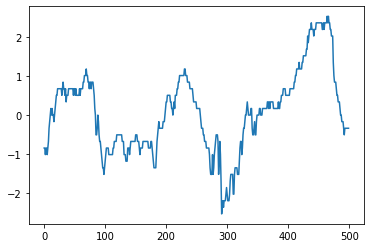

In [33]:
plt.plot(pm25_shanghai[:500])
plt.show()

In [0]:
X_shanghai_train, X_shanghai_test, y_shanghai_train, y_shanghai_test = train_test_split(X_shanghai, y_shanghai)

In [0]:
X_shanghai_train = X_shanghai_train.reshape(X_shanghai_train.shape[0], -1, 1)
X_shanghai_test = X_shanghai_test.reshape(X_shanghai_test.shape[0], -1, 1)

In [0]:
URL_base_model = "https://raw.githubusercontent.com/vishal-pandey/iot-transfer/master/pm25_beijing_cnn_model.h5"

In [49]:
!wget $URL_base_model

--2020-03-13 08:54:00--  https://raw.githubusercontent.com/vishal-pandey/iot-transfer/master/pm25_beijing_cnn_model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 480832 (470K) [application/octet-stream]
Saving to: ‘pm25_beijing_cnn_model.h5’

pm25_beijing_cnn_mo 100%[===================>] 469.56K  --.-KB/s    in 0.06s   

2020-03-13 08:54:00 (7.40 MB/s) - ‘pm25_beijing_cnn_model.h5’ saved [480832/480832]



In [0]:
from keras.models import load_model
model = load_model('pm25_beijing_cnn_model.h5')

In [51]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 43, 64)            256       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 21, 64)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 19, 32)            6176      
_________________________________________________________________
flatten_2 (Flatten)          (None, 608)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                30450     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 255       
Total params: 37,137
Trainable params: 37,137
Non-trainable params: 0
__________________________________________________

In [52]:
model.fit(X_shanghai_train, y_shanghai_train, epochs=20, validation_data=(X_shanghai_test, y_shanghai_test))

Train on 416 samples, validate on 139 samples
Epoch 1/20
416/416 [==============================] - 0s 635us/step - loss: 0.0336 - acc: 0.4183 - val_loss: 0.0456 - val_acc: 0.4460
Epoch 2/20
416/416 [==============================] - 0s 188us/step - loss: 0.0307 - acc: 0.3942 - val_loss: 0.0383 - val_acc: 0.4604
Epoch 3/20
416/416 [==============================] - 0s 181us/step - loss: 0.0280 - acc: 0.4351 - val_loss: 0.0389 - val_acc: 0.4748
Epoch 4/20
416/416 [==============================] - 0s 178us/step - loss: 0.0263 - acc: 0.4327 - val_loss: 0.0410 - val_acc: 0.4604
Epoch 5/20
416/416 [==============================] - 0s 192us/step - loss: 0.0244 - acc: 0.4567 - val_loss: 0.0410 - val_acc: 0.4748
Epoch 6/20
416/416 [==============================] - 0s 190us/step - loss: 0.0234 - acc: 0.4519 - val_loss: 0.0420 - val_acc: 0.4676
Epoch 7/20
416/416 [==============================] - 0s 193us/step - loss: 0.0228 - acc: 0.4423 - val_loss: 0.0414 - val_acc: 0.4676
Epoch 8/20
416/4